# Getting Started with Qiskit

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ionq-samples/getting-started/blob/main/qiskit.ipynb)

[Qiskit](https://qiskit.org/) is an open-source quantum computing framework developed by IBM for building, simulating, and running quantum circuits on real and simulated quantum devices.

In [1]:
%%capture

# First, we install the essential libraries to our current Python runtime.
# "%%capture" (above) captures and in this case, hides the output of this 
# cell, so you can comment it out if you need help debugging this step.

%pip install qiskit qiskit_ionq matplotlib pylatexenc

In [2]:
import os, qiskit_ionq
from getpass import getpass

# Before you begin, get your API key from https://cloud.ionq.com/settings/keys

# If your API key is stored as "IONQ_API_KEY" in your local environment, this
# should find it. Otherwise you'll be prompted to enter your API key manually.

api_key = os.getenv('IONQ_API_KEY')

if not api_key:
    try:
        from getpass import getpass
        api_key = getpass('Enter your IonQ API key: ')
    except:
        raise RuntimeError("API key is not set and input is not supported in this environment. Please set the IONQ_API_KEY environment variable.")

provider = qiskit_ionq.IonQProvider(api_key)

# We need to specify a backend, which is where the circuit will be executed. In
# this case we're using the `ionq_simulator`, but if you have QPU access you
# can specify it here to run the job on a QPU directly.

backend = provider.get_backend('ionq_simulator')

In [3]:
from qiskit import QuantumCircuit

# Now we set up our circuit. In this case, we're creating a circuit with two
# qubits, applying an H gate to qubit-0, a CXGate to both, then measuring.

qc = QuantumCircuit(2, name="Qiskit Example Circuit")
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

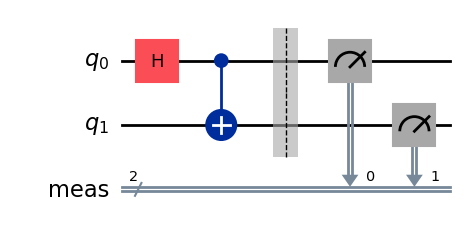

In [4]:
# Before submitting the job, we can visualize the circuit using draw().
# We're using matplotlib to create a pretty graphic, but draw() defaults to 
# plaintext and supports other libraries like LaTeX.

qc.draw('mpl')

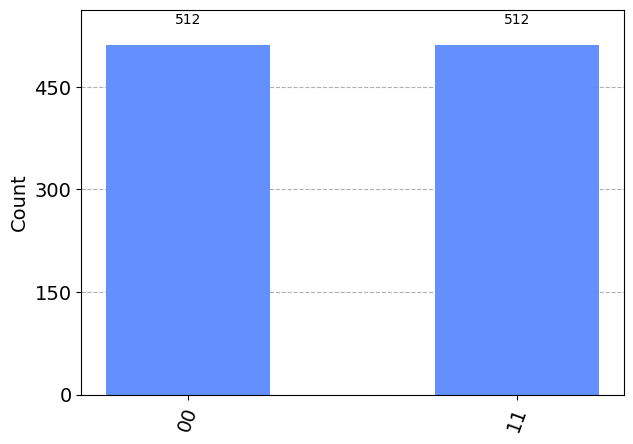

In [5]:
from qiskit.visualization import plot_histogram

# Now we'll send the job to our backend for processing.

job = backend.run(qc)

# And once the job has run, we can plot the results.

plot_histogram(job.result().get_counts())

## And that's a wrap!

To continue learning with Qiskit, check out more advanced examples here: https://github.com/ionq-samples/qiskit-getting-started